In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
K.image_data_format()

'channels_last'

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


### Reshape for CNN 

In [6]:
x_train = x_train.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
x_test = x_test.reshape(-1,28, 28, 1)
print(x_test.shape)

(10000, 28, 28, 1)


In [8]:
input_shape1 = (28, 28, 1)

### Hyper paramemters

In [9]:
nb_epoch = 5
num_classes = 10
batch_size = 128

### Model definition

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

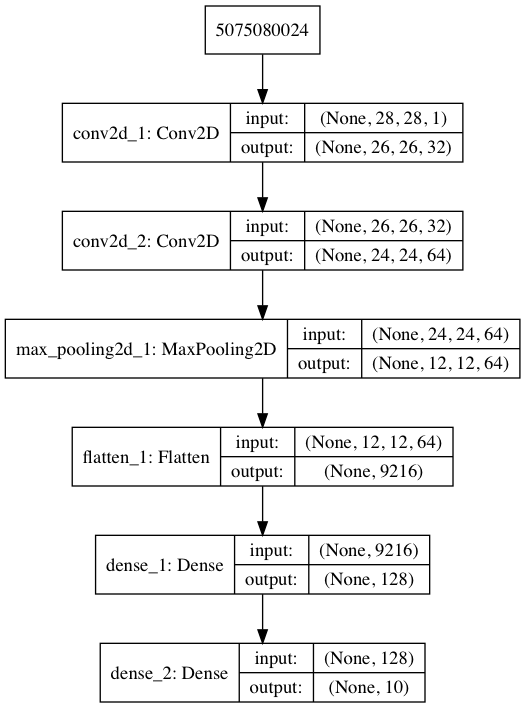

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='modelCNN.png', show_shapes=True)
plot_model(model, to_file='modelCNN.svg', show_shapes=True)
from IPython.display import Image
Image("modelCNN.png")

In [14]:
model.fit(x_train, y_train, epochs=nb_epoch)

Epoch 1/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.1099 - acc: 0.9668
Epoch 2/5
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0363 - acc: 0.9887
Epoch 3/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0235 - acc: 0.9926
Epoch 4/5
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0155 - acc: 0.9949
Epoch 5/5
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0120 - acc: 0.9963


### *Real World Challenge*: Difference between training and testing set accuracy

#### Test accuracy

In [15]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 8s 838us/step


In [16]:
score

[0.032913189715188126, 0.9906]

In [17]:
print('Test loss:{}'.format(score[0]))
print('Test accuracy:{}'.format(score[1]))

Test loss:0.032913189715188126
Test accuracy:0.9906


#### Training accuarcy

In [18]:
score2 = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 45s 751us/step


In [19]:
print('Training loss:{}'.format(score2[0]))
print('Training accuracy:{}'.format(score2[1]))

Training loss:0.006168357521093155
Training accuracy:0.9980166666666667


#### Q. What is the difference between the training and test accuracy ?

In [20]:
print('Test Accuracy : {} VS Training Accuracy : {}'.format(score[1], score2[1]))

Test Accuracy : 0.9906 VS Training Accuracy : 0.9980166666666667
